In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from citipy import citipy

from datetime import datetime 
import requests

# Import the API key.
from config import weather_api_key 

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs) 

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities) 

648

In [ ]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1 

Beginning Data Retrieval     
-----------------------------


In [14]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i] 

In [15]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Indicate that Data Loading is complete.

Processing Record 1 of Set 13 | butaritari
Processing Record 2 of Set 13 | albany
Processing Record 3 of Set 13 | cape town
Processing Record 4 of Set 13 | arraial do cabo
Processing Record 5 of Set 13 | rungata
City not found. Skipping...
Processing Record 6 of Set 13 | qaanaaq
Processing Record 7 of Set 13 | nisia floresta
Processing Record 8 of Set 13 | billere
Processing Record 9 of Set 13 | dingle
Processing Record 10 of Set 13 | carnarvon
Processing Record 11 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 13 | saldanha
Processing Record 13 of Set 13 | hermanus
Processing Record 14 of Set 13 | ormara
Processing Record 15 of Set 13 | thompson
Processing Record 16 of Set 13 | dikson
Processing Record 17 of Set 13 | rikitea
Processing Record 18 of Set 13 | punta arenas
Processing Record 19 of Set 13 | ambulu
Processing Record 20 of Set 13 | olinda
Processing Record 21 of Set 13 | mataura
Processing Record 22 of Set 13 | mahebourg
Processing Recor

Processing Record 35 of Set 16 | atka
City not found. Skipping...
Processing Record 36 of Set 16 | necochea
Processing Record 37 of Set 16 | kulhudhuffushi
Processing Record 38 of Set 16 | nikel
Processing Record 39 of Set 16 | carutapera
Processing Record 40 of Set 16 | korla
Processing Record 41 of Set 16 | ola
Processing Record 42 of Set 16 | diego de almagro
Processing Record 43 of Set 16 | tuktoyaktuk
Processing Record 44 of Set 16 | batemans bay
Processing Record 45 of Set 16 | ukiah
Processing Record 46 of Set 16 | maraa
Processing Record 47 of Set 16 | bubaque
Processing Record 48 of Set 16 | aklavik
Processing Record 49 of Set 16 | henties bay
Processing Record 50 of Set 16 | nanortalik
Processing Record 1 of Set 17 | sao filipe
Processing Record 2 of Set 17 | birjand
Processing Record 3 of Set 17 | provideniya
Processing Record 4 of Set 17 | rongai
Processing Record 5 of Set 17 | yulara
Processing Record 6 of Set 17 | norman wells
Processing Record 7 of Set 17 | saryshagan
Ci

Processing Record 20 of Set 20 | byron bay
Processing Record 21 of Set 20 | huangnihe
Processing Record 22 of Set 20 | reconquista
Processing Record 23 of Set 20 | coquimbo
Processing Record 24 of Set 20 | basco
Processing Record 25 of Set 20 | paamiut
Processing Record 26 of Set 20 | jinchang
Processing Record 27 of Set 20 | sorland
Processing Record 28 of Set 20 | riyadh
Processing Record 29 of Set 20 | makakilo city
Processing Record 30 of Set 20 | dongsheng
Processing Record 31 of Set 20 | turukhansk
Processing Record 32 of Set 20 | kemijarvi
Processing Record 33 of Set 20 | camacha
Processing Record 34 of Set 20 | rudnogorsk
Processing Record 35 of Set 20 | mollendo
Processing Record 36 of Set 20 | briancon
Processing Record 37 of Set 20 | falam
Processing Record 38 of Set 20 | belaya gora
Processing Record 39 of Set 20 | krasnyy yar
Processing Record 40 of Set 20 | inuvik
Processing Record 41 of Set 20 | wailuku
Processing Record 42 of Set 20 | port blair
Processing Record 43 of 

Processing Record 7 of Set 24 | kabanjahe
Processing Record 8 of Set 24 | emerald
Processing Record 9 of Set 24 | portland
Processing Record 10 of Set 24 | biak
Processing Record 11 of Set 24 | corrente
Processing Record 12 of Set 24 | verkh-usugli
Processing Record 13 of Set 24 | flinders
Processing Record 14 of Set 24 | ponta delgada
Processing Record 15 of Set 24 | shu
Processing Record 16 of Set 24 | juneau
Processing Record 17 of Set 24 | nampula
Processing Record 18 of Set 24 | leh
Processing Record 19 of Set 24 | san-pedro
Processing Record 20 of Set 24 | porirua
Processing Record 21 of Set 24 | banepa
Processing Record 22 of Set 24 | manta
Processing Record 23 of Set 24 | padang
Processing Record 24 of Set 24 | hearst
Processing Record 25 of Set 24 | kyra
Processing Record 26 of Set 24 | belyy yar
Processing Record 27 of Set 24 | pisco
Processing Record 28 of Set 24 | balasheyka
Processing Record 29 of Set 24 | broome
Processing Record 30 of Set 24 | karaul
City not found. Skip

In [16]:
city_data

[{'City': 'Butaritari',
  'Lat': 3.0707,
  'Lng': 172.7902,
  'Max Temp': 82.67,
  'Humidity': 71,
  'Cloudiness': 93,
  'Wind Speed': 11.97,
  'Country': 'KI',
  'Date': '2021-10-15 21:41:06'},
 {'City': 'Albany',
  'Lat': 42.6001,
  'Lng': -73.9662,
  'Max Temp': 72.45,
  'Humidity': 84,
  'Cloudiness': 83,
  'Wind Speed': 4.12,
  'Country': 'US',
  'Date': '2021-10-15 21:40:48'},
 {'City': 'Cape Town',
  'Lat': -33.9258,
  'Lng': 18.4232,
  'Max Temp': 58.1,
  'Humidity': 68,
  'Cloudiness': 75,
  'Wind Speed': 4,
  'Country': 'ZA',
  'Date': '2021-10-15 21:41:07'},
 {'City': 'Arraial Do Cabo',
  'Lat': -22.9661,
  'Lng': -42.0278,
  'Max Temp': 82.26,
  'Humidity': 69,
  'Cloudiness': 0,
  'Wind Speed': 12.66,
  'Country': 'BR',
  'Date': '2021-10-15 21:38:09'},
 {'City': 'Qaanaaq',
  'Lat': 77.484,
  'Lng': -69.3632,
  'Max Temp': 21.88,
  'Humidity': 90,
  'Cloudiness': 100,
  'Wind Speed': 7.58,
  'Country': 'GL',
  'Date': '2021-10-15 21:41:08'},
 {'City': 'Nisia Floresta',
  '

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10) 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,82.67,71,93,11.97,KI,2021-10-15 21:41:06
1,Albany,42.6001,-73.9662,72.45,84,83,4.12,US,2021-10-15 21:40:48
2,Cape Town,-33.9258,18.4232,58.10,68,75,4.00,ZA,2021-10-15 21:41:07
3,Arraial Do Cabo,-22.9661,-42.0278,82.26,69,0,12.66,BR,2021-10-15 21:38:09
4,Qaanaaq,77.4840,-69.3632,21.88,90,100,7.58,GL,2021-10-15 21:41:08
5,Nisia Floresta,-6.0911,-35.2086,81.41,77,40,12.03,BR,2021-10-15 21:41:08
6,Billere,43.3000,-0.4000,59.54,88,90,3.44,FR,2021-10-15 21:41:08
7,Dingle,10.9995,122.6711,75.18,91,88,1.39,PH,2021-10-15 21:40:05
8,Carnarvon,-24.8667,113.6333,68.07,73,19,9.22,AU,2021-10-15 21:40:36
9,Saldanha,-33.0117,17.9442,53.65,67,16,18.37,ZA,2021-10-15 21:41:10


In [18]:
new_column_order = ["City" ,"Country" ,"Date" , "Lat" ,"Lng" , "Max Temp","Humidity","Cloudiness" ,"Wind Speed"]
df = city_data_df[new_column_order] 
df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2021-10-15 21:41:06,3.0707,172.7902,82.67,71,93,11.97
1,Albany,US,2021-10-15 21:40:48,42.6001,-73.9662,72.45,84,83,4.12
2,Cape Town,ZA,2021-10-15 21:41:07,-33.9258,18.4232,58.10,68,75,4.00
3,Arraial Do Cabo,BR,2021-10-15 21:38:09,-22.9661,-42.0278,82.26,69,0,12.66
4,Qaanaaq,GL,2021-10-15 21:41:08,77.4840,-69.3632,21.88,90,100,7.58
...,...,...,...,...,...,...,...,...,...
589,Barddhaman,IN,2021-10-15 21:45:20,23.2500,87.8500,79.72,81,100,5.26
590,Sipe Sipe,BO,2021-10-15 21:45:21,-17.4500,-66.3833,75.69,42,24,11.79
591,Phan Thiet,VN,2021-10-15 21:45:21,10.9333,108.1000,76.01,95,100,5.95
592,Malpe,IN,2021-10-15 21:45:22,13.3500,74.7167,79.90,88,98,1.19


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID") 

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

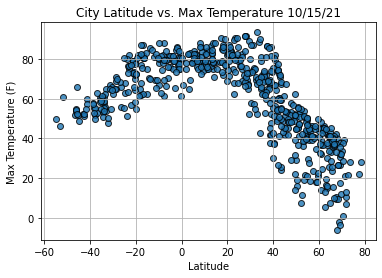

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

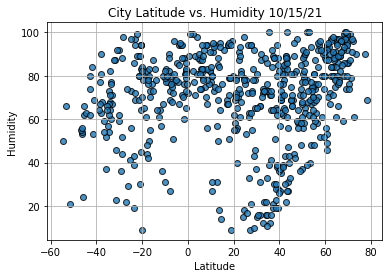

In [22]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

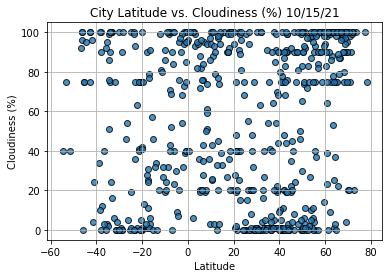

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show() 

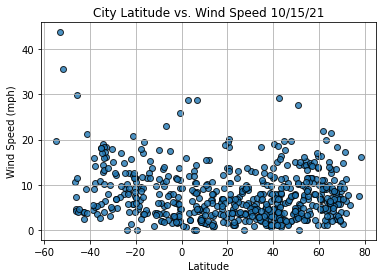

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show() 